# Analisis de correlacion entre rating y numero de peliculas por genero

En este notebook, nos enfocaremos en explorar y analizar las relaciones existentes entre dos variables específicas: **'Numero de generos'** y **'imdb_score'**. Nuestro objetivo principal es investigar si existe una correlación entre la calificación media de un género y el número de películas producidas en los años siguientes

Las bibliotecas que se utilizarán para realizar el análisis:
**Pandas**,
**Matplotlib**,
**Numpy**,
**Sklearn**,
**Scipy**,
**Statsmodels**

Para llevar a cabo este análisis, seguiremos varios pasos clave:

1.  **Limpieza y Preparación de Datos:** Como primer paso, se examinará el conjunto de datos y se modificarán los datos eliminándolos o cambiando su formato para el desarrollo del análisis.
    
2.  **Exploración de Datos:** Realizaremos una exploración inicial de los datos para entender la distribución de ambas variables, incluyendo estadísticas descriptivas como la media, mediana, desviación estándar, y la visualización a través de histogramas, diagramas de caja, o gráficos de densidad. Esto nos permitirá identificar tendencias generales, así como cualquier anomalía o dato atípico.
    
3.  **Análisis de Correlación:** Utilizaremos métodos estadísticos para evaluar la correlación entre 'Numero de peliculas' y 'votacion'. La correlación nos indica si existe una relación entre estas dos variables y, de ser así, qué tan fuerte es esa relación. Esto puede incluir el cálculo del coeficiente de correlación de Pearson o Spearman, dependiendo de la naturaleza y distribución de los datos.
    
4.  **Visualización de Relaciones:** Para complementar nuestro análisis cuantitativo, crearemos visualizaciones como scatter plot y lineas de regresion. Estas visualizaciones pueden ayudarnos a identificar patrones, tendencias o agrupaciones específicas dentro de los datos.
    
5.  **Interpretación y Conclusiones:** Finalmente, interpretaremos los resultados de nuestro análisis, tratando de extraer conclusiones sobre la relación entre el numero de peliculas y la votacion media por genero. Consideraremos si una mejor votacion promedia del genero implica un aumento de la produccion de peliculas del genero. 

# 1. Limpieza y Preparación de Datos: 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('df_stream_kaggle.csv')
df.head()

,Unnamed: 0,id,title,type,description,release_year,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,nconst,primaryName,subscription_cost
0,0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,"['western', 'action', 'romance']",US,0.00,...,1213.00,4.08,4.70,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.00,nm0102908,Robert N. Bradbury,14.99 CAD / month
1,1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,99,"['scifi', 'animation']",CN,0.00,...,117.00,6.13,3.80,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,nm5694753,Leon Ding,14.99 CAD / month
2,2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,81,"['romance', 'comedy']",US,0.00,...,181.00,3.29,4.80,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,nm1526422,Diane Cossa,14.99 CAD / month
3,3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,70,"['drama', 'thriller']",US,0.00,...,48.00,0.60,5.99,amazon,drama,[nan],NaN,nm5211977,David S Womack,14.99 CAD / month
4,4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,96,"['horror', 'thriller']",US,0.00,...,464.00,3.54,5.80,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,nm3810788,Michael P. Blevins,14.99 CAD / month


In [40]:
# Se quitan las columnas no necesarias

df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,...,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,nconst,primaryName,subscription_cost
0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,"['western', 'action', 'romance']",US,0.00,tt0025440,...,1213.00,4.08,4.70,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.00,nm0102908,Robert N. Bradbury,14.99 CAD / month
1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,99,"['scifi', 'animation']",CN,0.00,tt11654032,...,117.00,6.13,3.80,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,nm5694753,Leon Ding,14.99 CAD / month
2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,81,"['romance', 'comedy']",US,0.00,tt11333938,...,181.00,3.29,4.80,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,nm1526422,Diane Cossa,14.99 CAD / month
3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,70,"['drama', 'thriller']",US,0.00,tt13814142,...,48.00,0.60,5.99,amazon,drama,[nan],NaN,nm5211977,David S Womack,14.99 CAD / month
4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,96,"['horror', 'thriller']",US,0.00,tt7752100,...,464.00,3.54,5.80,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,nm3810788,Michael P. Blevins,14.99 CAD / month


In [41]:
# Exploracion de la columna de los generos de las peliculas

print(type(df['genres'][0]))

<class 'str'>


In [42]:
# Para el análisis necesitamos un formato de género tipo lista
# Convertimos el tipo de Strings en un Listas de géneros para 
# Posteriormente se crearan columnas Dummies que se ajusten al conjunto de datos para el análisis

# Utilizo de la funcion apply de la libreria pandas al dataset
df['genres']=df['genres'].apply(lambda x: x.strip("[]").replace("'",'').split(", "))

# Se comprueba el resultado 
print(type(df['genres'][0]))

<class 'list'>


In [43]:
# Utilizo de la libreria sklearn para construir las columnas dummies

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [44]:
# Construccion de nuevo dataset
df_1 = pd.DataFrame(mlb.fit_transform(df['genres']), columns = mlb.classes_, index = df.index)

# Incluir las nuevas columnas
df = pd.concat([df, df_1], axis=1)

# Comprobar el resultado
df.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,"[western, action, romance]",US,0.00,tt0025440,...,0,0,0,0,1,0,0,0,0,1
1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,99,"[scifi, animation]",CN,0.00,tt11654032,...,0,0,0,0,0,1,0,0,0,0
2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,81,"[romance, comedy]",US,0.00,tt11333938,...,0,0,0,0,1,0,0,0,0,0
3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,70,"[drama, thriller]",US,0.00,tt13814142,...,0,0,0,0,0,0,0,1,0,0
4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,96,"[horror, thriller]",US,0.00,tt7752100,...,0,1,0,0,0,0,0,1,0,0


# 2.1 Exploracion de los datos

In [45]:
# Se centra sobre la exploracion de los datos numericos sobre los votos de las peliculas

ratings = df.loc[:,'imdb_id':'imdb_votes']
ratings.head()

,imdb_id,imdb_score,imdb_votes
0,tt0025440,5.60,1213.00
1,tt11654032,5.40,117.00
2,tt11333938,4.40,181.00
3,tt13814142,2.00,48.00
4,tt7752100,4.50,464.00


In [46]:
# Modifica del formato de los numeros

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Estadisticas descriptivas


ratings.describe()

,imdb_score,imdb_votes
count,18719.00,18719.00
mean,6.01,26743.74
std,1.26,110867.81
min,0.50,5.00
25%,5.30,218.00
50%,6.10,1027.00
75%,6.90,6711.00
max,10.00,2555504.00


Desde este resultado se puede concluir que existe una gran influencia en el número medio de críticas que reciben las películas muy populares (el valor de la mediana, 1027, es muy diferente del de la media, 26743). Mientras que, por lo de las evaluaciones, en general no es tan diferente.

Se estudiara ahora la distribucion de las evaluaciones

<AxesSubplot:>

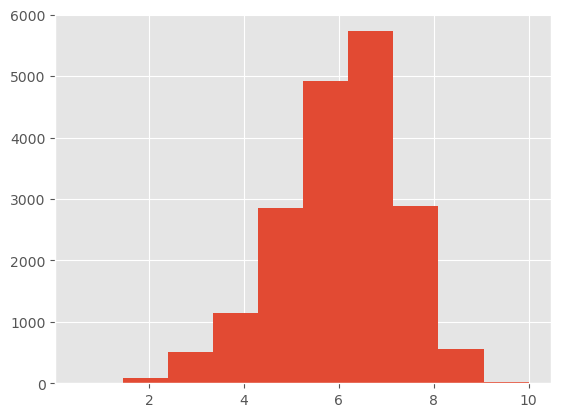

In [47]:
# Estudio de la distribucion del valor de las votaciones
# Eje X es el valore, Eje Y es el numero de peliculas

# Hay una cola de peliculas peores, mientras que la mayoria son entre el 5 y el 7

ratings['imdb_score'].hist()

EL fenomeno de la Larga Cola

<AxesSubplot:>

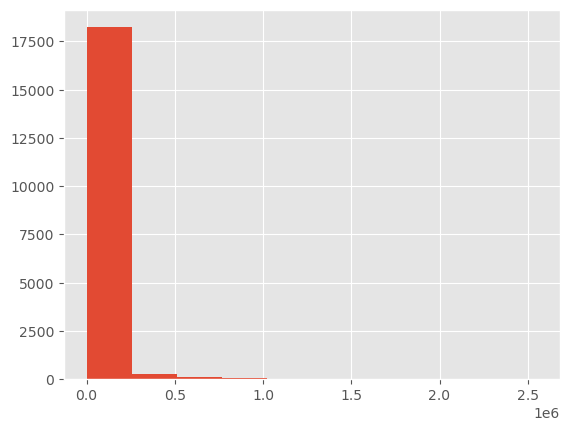

In [48]:
# Estudio del numero de opiniones

# Aqui la mayoria de las peliculas no tienen evaluaciones
ratings['imdb_votes'].hist()

(0.0, 5000.0)

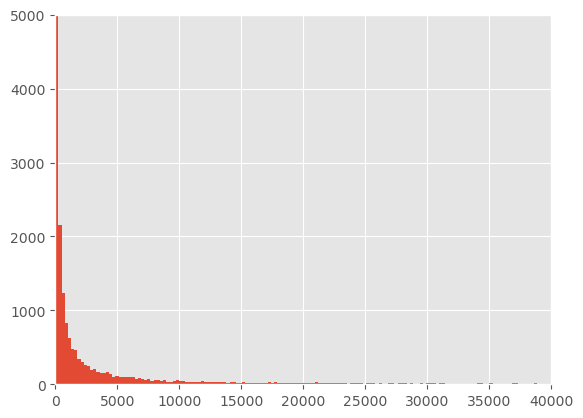

In [49]:
# Modifica de la grafica para mejor visualizacion
p = ratings['imdb_votes'].hist(bins=10000)
p.set_xlim(0,40000)
p.set_ylim(0, 5000)

La mayoria de las peliculas tiene muy pocas criticas, y por esto hay una gran influencia sobre el valor de la media del numero de criticas

# 2.2 Preparacion del dataset

In [50]:
# Creacion del dataset para el trabajo

# Creacion de una columna para el genero de cada pelicula donde la dummy columna es igual a 1
df_melted = df.melt(id_vars=['id','title','imdb_score','release_year'], value_vars=df_1.columns, var_name='Genre')

# Si la columna es igual a 1 significa que la pelicula pertenece a el genero
df_melted = df_melted[df_melted['value']==1]

# Quitar la columna con los 1
df_melted.drop(columns='value',inplace=True)

# Definicion de nuevo dataset donde poner el resulado final para el analisis
df_trend = pd.DataFrame(columns= list(df_1.columns))


In [51]:
# Poner los datos
for genre in df_melted['Genre'].unique():
    df_ = df_melted[df_melted['Genre']==genre]
    list_ratings = df_.groupby('release_year')['imdb_score'].median()
    df_trend[f'{genre}'] = list_ratings
df_trend

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
release_year,,,,,,,,,,,,,,,,,,,
1918,5.80,NaN,6.50,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,NaN,NaN,NaN,6.60,6.50
1920,6.70,NaN,5.20,5.90,NaN,6.00,NaN,NaN,NaN,NaN,6.90,NaN,NaN,6.70,6.90,5.20,NaN,6.70,7.10
1922,7.60,NaN,5.50,5.50,7.60,6.10,7.75,7.10,7.75,7.60,5.50,NaN,NaN,7.10,NaN,NaN,NaN,NaN,NaN
1923,7.00,NaN,7.30,6.60,NaN,6.50,NaN,7.40,NaN,NaN,7.20,NaN,NaN,7.05,NaN,NaN,8.10,NaN,6.60
1925,6.50,NaN,6.80,NaN,6.40,6.60,6.60,7.85,7.00,6.60,7.50,NaN,NaN,6.55,7.00,6.95,7.00,8.00,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,5.70,6.60,5.80,5.80,7.00,6.10,6.30,5.95,5.65,6.65,4.50,6.55,7.30,6.00,5.20,6.90,5.35,6.50,4.50
2019,5.60,6.10,5.90,6.05,7.00,6.20,6.20,5.90,5.80,6.80,4.60,6.85,6.10,6.00,5.45,6.50,5.60,6.10,5.70
2020,5.70,6.25,5.90,5.90,6.90,6.10,5.50,5.90,5.60,6.80,4.70,6.50,7.15,5.90,5.35,6.30,5.40,6.70,6.10


In [52]:
# Limitar a los anos desde el 2000 hast el 2021
df_trend_from_2000 = df_trend.loc[2000:2021,'action':]
df_trend_from_2000.reset_index(inplace=True)
df_trend_from_2000

,release_year,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,2000,6.00,6.30,6.25,6.05,7.20,6.30,6.70,5.95,5.90,6.75,5.80,7.20,NaN,6.35,5.45,6.30,6.00,7.10,6.20
1,2001,5.90,6.90,6.20,6.20,7.40,6.40,6.10,6.20,6.40,7.65,5.45,6.40,NaN,6.40,6.05,6.50,5.90,7.60,NaN
2,2002,5.95,5.90,6.00,6.10,7.05,6.50,6.90,5.80,6.25,7.40,4.90,6.00,NaN,6.50,6.30,5.90,5.80,7.00,6.90
3,2003,6.60,6.10,5.95,7.00,6.92,6.50,6.30,5.70,5.80,7.25,5.70,6.30,NaN,6.20,6.30,6.25,6.65,6.90,6.50
4,2004,6.50,6.60,6.00,6.60,7.15,6.60,6.70,5.80,6.60,7.40,4.90,5.55,NaN,6.10,5.80,6.70,6.40,7.10,5.80
5,2005,6.25,6.30,6.20,6.35,7.00,6.30,6.50,6.10,6.20,7.15,5.25,5.95,6.20,6.20,5.70,6.80,5.90,6.40,5.95
6,2006,6.35,6.40,6.10,6.50,7.25,6.20,6.60,5.50,6.35,7.25,5.20,6.50,NaN,6.00,5.45,7.00,5.90,6.80,6.65
7,2007,6.20,6.75,6.10,6.55,7.20,6.50,6.20,6.10,6.10,7.10,4.50,6.20,6.90,6.15,4.95,5.65,6.10,6.95,5.10
8,2008,6.00,6.50,6.00,6.00,7.00,6.40,6.10,5.80,6.00,6.95,4.60,6.80,NaN,6.50,5.10,5.80,5.30,6.85,5.30
9,2009,6.20,6.90,6.30,6.05,6.80,6.40,6.30,6.10,6.40,7.20,5.40,6.40,NaN,6.35,6.50,5.90,6.00,7.10,5.60


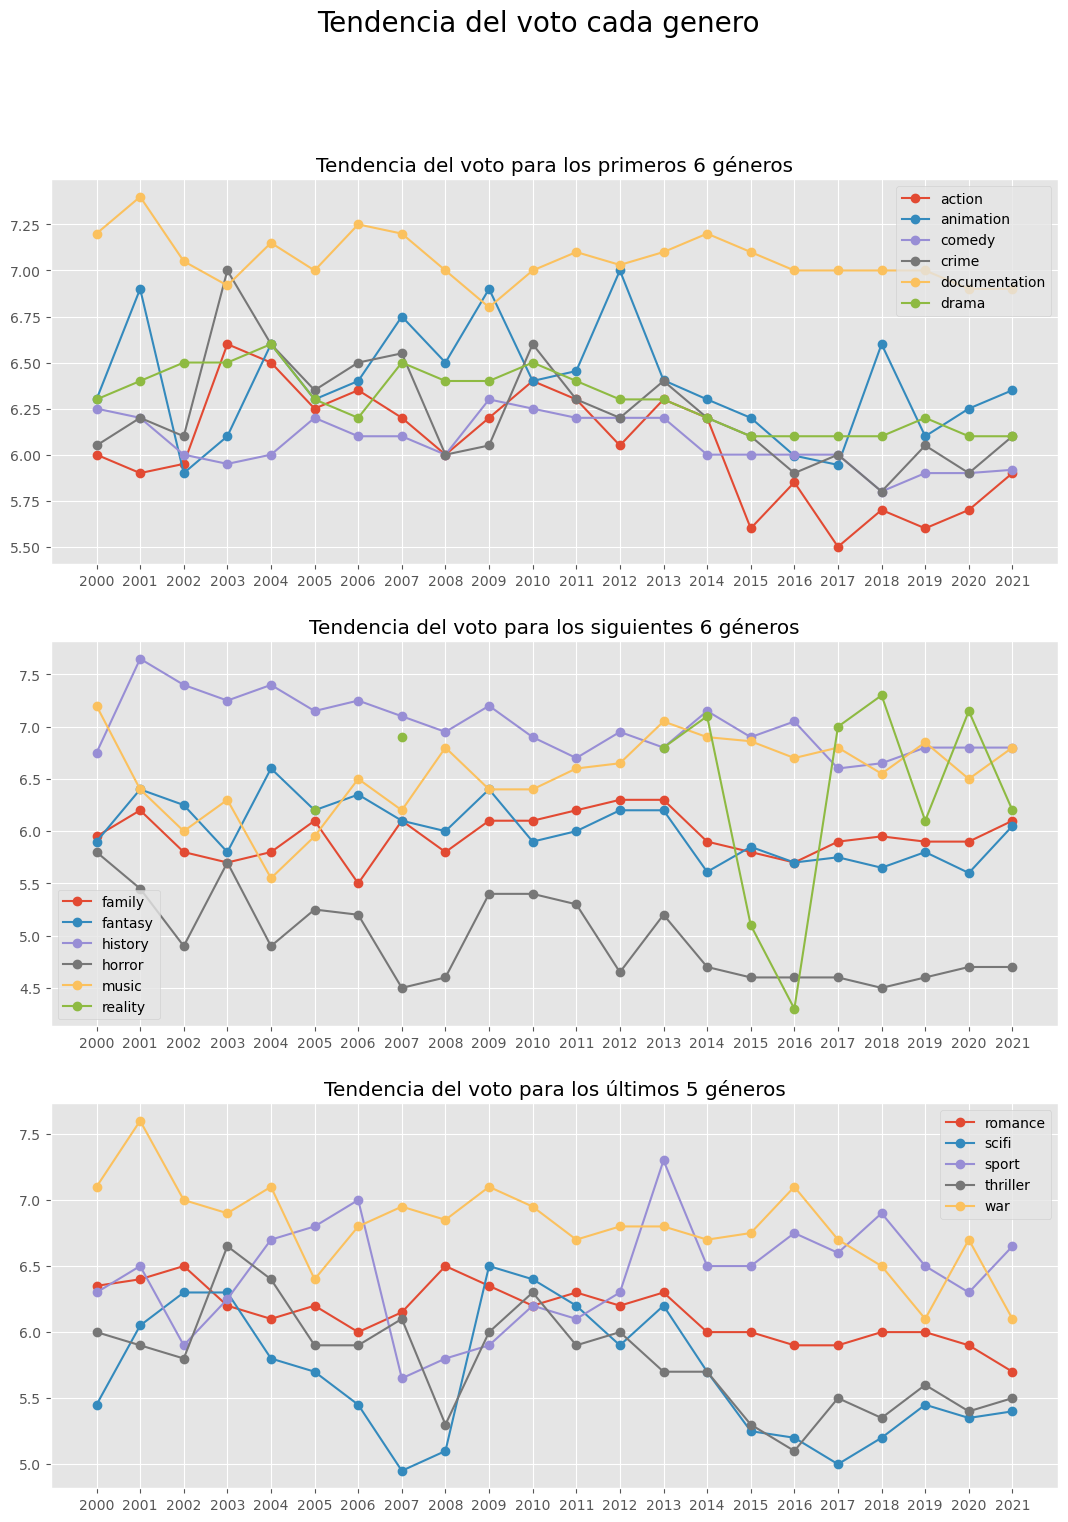

In [53]:
# Visualizacion grafica de la tendencia de los primero 10 generos en numero de peliculas
fig, ax = plt.subplots(3, 1, figsize=(13, 17))
plt.style.use('ggplot')

tiempo = df_trend_from_2000['release_year']

for col in df_trend_from_2000.columns[1:7]:
    ax[0].plot(tiempo, df_trend_from_2000[col], '-o', label=col)

for col in df_trend_from_2000.columns[8:14]:
    ax[1].plot(tiempo, df_trend_from_2000[col], '-o', label=col)
    
for col in df_trend_from_2000.columns[14:19]:
    ax[2].plot(tiempo, df_trend_from_2000[col], '-o', label=col)

# Applica titoli agli assi specifici
ax[0].set_title('Tendencia del voto para los primeros 6 géneros')
ax[1].set_title('Tendencia del voto para los siguientes 6 géneros')
ax[2].set_title('Tendencia del voto para los últimos 5 géneros')

# Aggiungi le legende
ax[0].legend()
ax[1].legend()
ax[2].legend()

# Aggiungi titolo e label agli assi x
fig.suptitle('Tendencia del voto cada genero', fontsize=20)  # Titolo della figura

# Applica xticks a tutti gli assi
for ax_i in ax:
    ax_i.set_xticks(tiempo)

plt.show()

In [54]:
df_melted

,id,title,imdb_score,release_year,Genre
0,tm100001,The Lucky Texan,5.60,1934,action
9,tm100070,Lost in the Stratosphere,4.50,1934,action
11,tm1001486,Enhanced,4.70,2019,action
24,tm100338,Beyond Bengal,5.20,1934,action
34,tm1006476,Saani Kaayidham,7.80,2022,action
...,...,...,...,...,...
355298,tm99682,The Man From Utah,5.10,1934,western
355301,tm99829,West of the Divide,5.20,1934,western
355303,tm99843,Wagon Wheels,5.60,1934,western
355305,tm99988,Randy Rides Alone,5.30,1934,western


Enfoque sobre el numero de peliculas

In [55]:
# Creacion del dataset
n_peliculas = pd.DataFrame(columns=df_trend_from_2000.columns)
n_peliculas['release_year'] = df_trend_from_2000['release_year']

# Poner los datos
for genere in df_melted['Genre'].unique():
    # Utilizar un dataframe variable dinamica que incluye solo el genero elegido de el for y desde el 2000 hasta el 2021 
    df_ = df_ = df_melted[(df_melted['Genre'] == genere) & (df_melted['release_year'] >= 2000) & (df_melted['release_year'] <= 2021)]
    n_lista = list(df_.groupby('release_year')['Genre'].count())
    if len(n_lista)==len(n_peliculas):
        n_peliculas[f'{genere}'] = list(n_lista)
    
    
n_peliculas.head()

,release_year,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,2000,32,7,58,16,11,70,15,24,19,4,15,7,NaN,30,16,6,37,2,NaN
1,2001,35,9,57,23,11,96,23,22,23,8,12,3,NaN,33,20,9,36,7,NaN
2,2002,46,13,69,39,14,114,25,39,26,10,20,5,NaN,31,16,7,51,11,NaN
3,2003,43,7,80,31,20,95,17,31,21,4,11,5,NaN,41,9,4,34,8,NaN
4,2004,51,14,93,23,20,105,25,33,25,7,19,10,NaN,56,25,7,47,9,NaN


In [56]:
# Antes de unir los dos dataframes se excluyen las columnas (generos) con NaNs

n_peliculas.dropna(axis=1, inplace=True)
df_trend_from_2000.dropna(axis=1,inplace=True)
print('Se han excluido los géneros: Reality y Western')

Se han excluido los géneros: Reality y Western


Ahora se unen los dos dataset, el sufijo "*_x*" significa Numero de peliculas, mientras que "*_y*" es la votacion

In [57]:
# Merge sobre los dos dataframes

df_merged = pd.merge(n_peliculas,df_trend_from_2000, on = 'release_year')
df_merged

,release_year,action_x,animation_x,comedy_x,crime_x,documentation_x,drama_x,european_x,family_x,fantasy_x,...,family_y,fantasy_y,history_y,horror_y,music_y,romance_y,scifi_y,sport_y,thriller_y,war_y
0,2000,32,7,58,16,11,70,15,24,19,...,5.95,5.90,6.75,5.80,7.20,6.35,5.45,6.30,6.00,7.10
1,2001,35,9,57,23,11,96,23,22,23,...,6.20,6.40,7.65,5.45,6.40,6.40,6.05,6.50,5.90,7.60
2,2002,46,13,69,39,14,114,25,39,26,...,5.80,6.25,7.40,4.90,6.00,6.50,6.30,5.90,5.80,7.00
3,2003,43,7,80,31,20,95,17,31,21,...,5.70,5.80,7.25,5.70,6.30,6.20,6.30,6.25,6.65,6.90
4,2004,51,14,93,23,20,105,25,33,25,...,5.80,6.60,7.40,4.90,5.55,6.10,5.80,6.70,6.40,7.10
5,2005,42,9,87,32,27,116,31,45,35,...,6.10,6.20,7.15,5.25,5.95,6.20,5.70,6.80,5.90,6.40
6,2006,52,15,92,33,40,113,24,31,26,...,5.50,6.35,7.25,5.20,6.50,6.00,5.45,7.00,5.90,6.80
7,2007,63,16,100,38,52,134,34,45,33,...,6.10,6.10,7.10,4.50,6.20,6.15,4.95,5.65,6.10,6.95
8,2008,72,22,109,56,52,142,41,31,37,...,5.80,6.00,6.95,4.60,6.80,6.50,5.10,5.80,5.30,6.85
9,2009,72,23,130,50,40,146,29,32,35,...,6.10,6.40,7.20,5.40,6.40,6.35,6.50,5.90,6.00,7.10


# 3. Análisis de Correlación

In [58]:
# Creacion del dataset donde poner las correlaciones

correlation_df = pd.DataFrame(columns=['Genre', 'Correlation'])

correlation_genre= []
correlation_value = []

for genre in list(df_trend_from_2000.columns[1:]):
    ratings_column = genre + '_x'
    movies_column = genre + '_y'
    correlation = df_merged[ratings_column].corr(df_merged[movies_column])
    correlation_genre.append(genre)
    correlation_value.append(correlation)

correlation_df['Genre'] = correlation_genre
correlation_df['Correlation'] = correlation_value

correlation_df

,Genre,Correlation
0,action,-0.71
1,animation,-0.27
2,comedy,-0.67
3,crime,-0.56
4,documentation,-0.41
5,drama,-0.76
6,european,-0.29
7,family,-0.06
8,fantasy,-0.58
9,history,-0.62


Para comprobar real correlacion se utilizan las ipotesis del coeficiente de Pearson

1. Randomness of data: Para comprobar una real correlacion es necesario comprobar que los datos pertenecen a una distribución aleatoria. Por eso se utiliza el **Runs-Test**, un Non Parametric Test.

Para comprobar la aleatoriedad se necesita que el p-value sea mayor de 5%

In [59]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

pvalues = []

for genre in list(n_peliculas.columns[1:]):
    _, pval_runs = runstest_1samp(n_peliculas[f'{genre}'], correction=False)
    pvalues.append(pval_runs)

# Visualiza los pvalues mayor de 5%
print('Runs test p-value =', [pvalue for pvalue in pvalues if pvalue>0.05])

Runs test p-value = []


Se necesita un test diferente porque hay aleatoriedad en el numero de peliculas a lo largo de los años

Utilizo del test de Spearman

In [60]:
# Librerias y metodos necesarios
from scipy.stats import spearmanr

# Creacion del dataset donde poner los resultados
df_spearman = pd.DataFrame(columns=['Genero','Correlacion','pvalue'])

correlation_spearman = []
pvalue_spearman = []

for genre in list(df_trend_from_2000.columns[1:]):

    ratings_column = genre + '_x'
    movies_column = genre + '_y'

    corr, p_value = spearmanr(df_merged[f'{ratings_column}'], df_merged[f'{movies_column}'])

    correlation_spearman.append(corr)
    pvalue_spearman.append(p_value)


df_spearman['Genero'] = list(df_trend_from_2000.columns[1:])
df_spearman['Correlacion'] = correlation_spearman
df_spearman['pvalue'] = pvalue_spearman

df_spearman = df_spearman[df_spearman['pvalue']<0.05].reset_index(drop=True)
df_spearman

,Genero,Correlacion,pvalue
0,action,-0.58,0.00
1,comedy,-0.54,0.01
2,crime,-0.58,0.00
3,documentation,-0.43,0.05
4,drama,-0.74,0.00
5,fantasy,-0.59,0.00
6,history,-0.66,0.00
7,horror,-0.72,0.00
8,music,0.54,0.01
9,romance,-0.72,0.00


Otra selección en función del nivel de correlación. Sólo se seleccionan los generos con un nivel de correlación definido como "Correlación fuerte" de acuerdo con la Tabla "*Example of a Conventional Approach to Interpreting a Correlation Coefficient*"

<div style="text-align:center">
    <img src="Correlation_thresholds.png" alt="abla interpretacion de correlacion" style="margin: auto;"/>
</div>

Desde: "**Correlation Coefficients: Appropriate Use and Interpretation**" (*Anesthesia & Analgesia 126(5):p 1763-1768, May 2018. | DOI: 10.1213/ANE.0000000000002864*)

In [61]:
df_spearman = df_spearman[abs(df_spearman['Correlacion'])>0.69].reset_index(drop=True)
df_spearman

,Genero,Correlacion,pvalue
0,drama,-0.74,0.00
1,horror,-0.72,0.00
2,romance,-0.72,0.00
3,thriller,-0.74,0.00


Para algunos geners hay una significatividad estatistica para concluir que hay correlacion entre las variables

Se puede ver que las correlaciones son todas negativas, entonces se concluye que con el aumentar de la calificacion de los generos, **el numero de peliculas del genero disminuye**

# 4. Visualización de Relaciones

Se comprueba si existe realmente la relacion entre las dos variables en los generos 

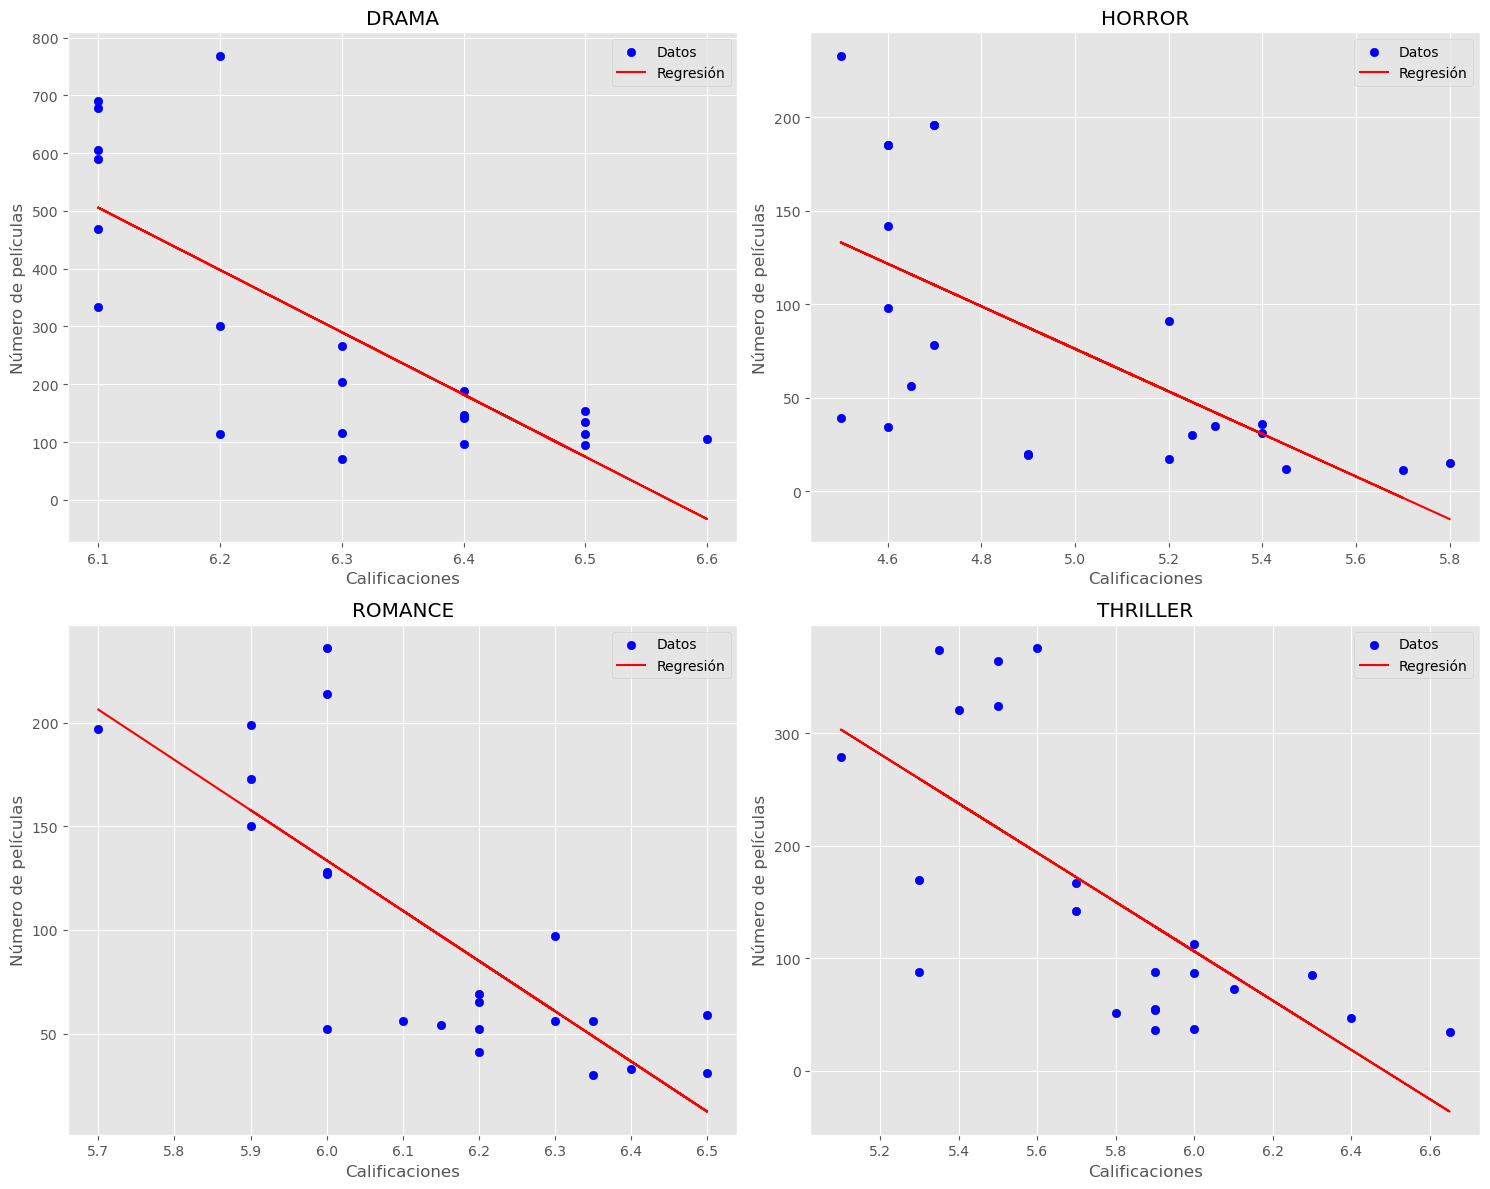

In [62]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Visualizacion grafica de la tendencia de los generos que tiene correlacion
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Creo una griglia di 2x2 subplot
plt.style.use('ggplot')

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Visualización gráfica de la tendencia de los géneros que tienen correlación
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Creo una griglia di 2x2 subplot
plt.style.use('ggplot')

# Iterando sobre los datos y creando subgráficos
for (index, row), ax in zip(df_spearman.iterrows(), axes.flatten()):
    ratings_column = row['Genero'] + '_y'
    movies_column = row['Genero'] + '_x'
    x = df_merged[f'{ratings_column}']
    y = df_merged[f'{movies_column}']

    # Agregando una columna de 1 para la intercepción
    X = sm.add_constant(x)

    # Cálculo de la regresión lineal con statsmodels
    model = sm.OLS(y, X)
    results = model.fit()

    # Creación del gráfico de dispersión
    ax.scatter(x, y, color='blue', label='Datos')
    ax.plot(x, results.predict(), color='red', label='Regresión')
    ax.set_title(row['Genero'].upper())
    ax.set_xlabel('Calificaciones')
    ax.set_ylabel('Número de películas')
    ax.legend()

plt.tight_layout()
plt.show()




## 5. Interpretación y Conclusiones:

Como ya se ha mencionado, las correlaciones son en la mayoría de los casos negativas, **lo que indica que no existe una causalidad tan fuerte.**

De los gráficos no se puede concluir si existen productoras en el mercado actual que utilicen este tipo de estrategias basadas en la tendencia de audiencia de un género. 

Por otro lado, se observa que un menor número de películas de un género influye positivamente en el resultado global del mismo. Esto se debe a que hay menos películas y, por tanto, menos dispersión de datos, por lo que **la calificación media de una película de éxito constituye una mejor estadística global.**

Desde este punto de vista, las productoras harían mejor **en invertir en películas de aquellos géneros que aún no están de moda o siguen siendo más de nicho**, lo que las convierte en películas más singulares que pueden **convertirse en representantes de un género**. Esto es gracias a la difusión de plataformas de streaming que permiten una distribución a gran escala de todos los géneros posibles.